In [2]:
%%bash
cd ../../../datag/blpd0/datax/Voyager_data
ls

Voyager1.single_coarse.fine_res.fil
Voyager1.single_coarse.fine_res.h5
Voyager1_block1.npy
blc3_2bit_guppi_57396_VOYAGER1_0006.0013.raw
index.html
test_ifs.fil


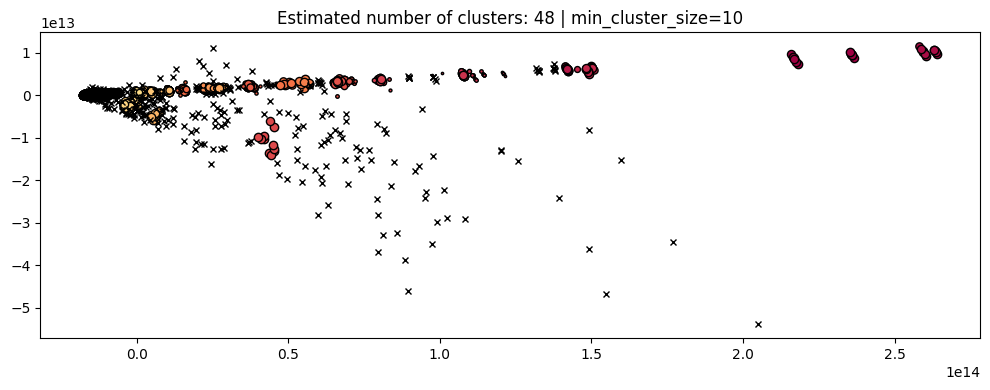

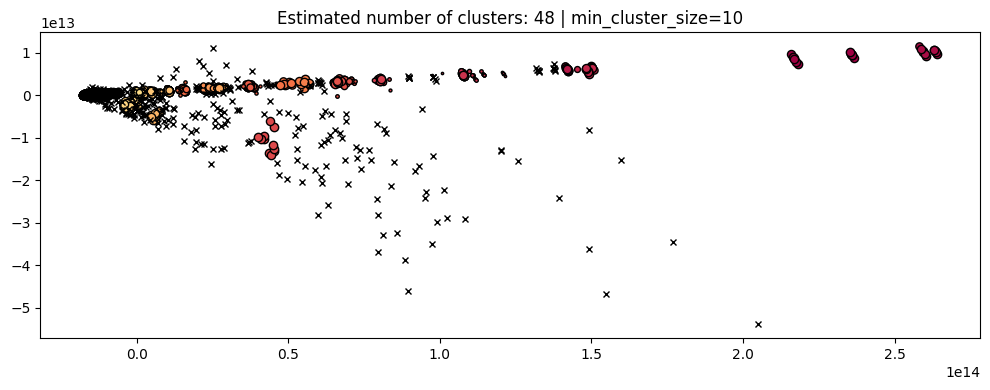

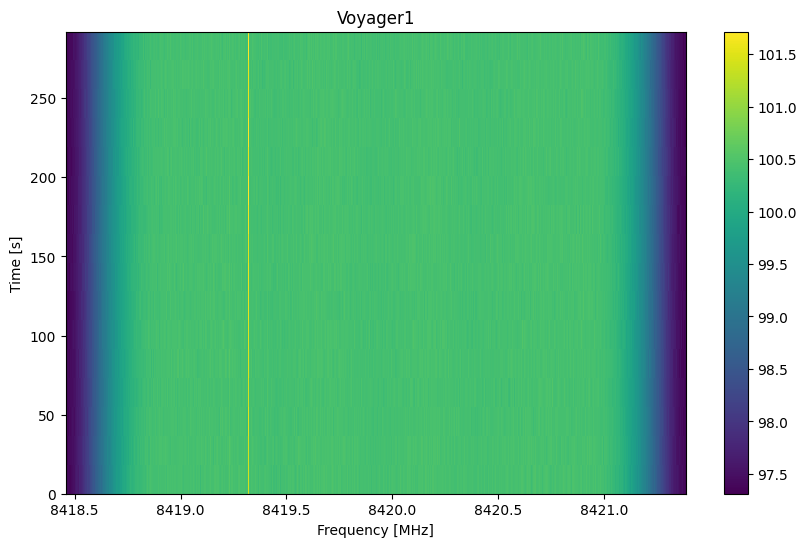

In [19]:
from blimpy import Waterfall

fil = Waterfall("../../../datag/blpd0/datax/Voyager_data/Voyager1.single_coarse.fine_res.h5")

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fil.plot_waterfall()
plt.savefig("test.png")

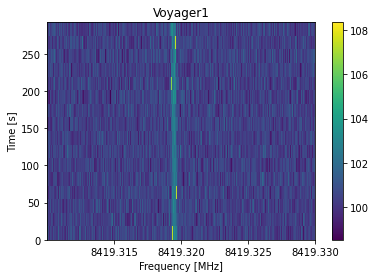

In [17]:
fil.plot_waterfall(f_start=8419.31, f_stop=8419.33)

In [1]:
import time
from blimpy import Waterfall
from turbo_seti.find_doppler.find_doppler import FindDoppler

H5DIR = "../../../datag/blpd0/datax/Voyager_data/"
H5PATH = H5DIR + "Voyager1.single_coarse.fine_res.h5"
OUT_DIR = "../output"

print("\nUsing HDF5 file: {}\nHeader and data shape:".format(H5PATH))
# -- Get a report of header and data shape
wf = Waterfall(H5PATH)
wf.info()
# -- Instantiate FindDoppler.
print("\nInstantiating the FindDoppler object.")
fdop = FindDoppler(datafile=H5PATH, max_drift=4, snr=25, out_dir=OUT_DIR)
# -- Search for hits and report elapsed time.
print("\nBegin doppler search.  Please wait ...")
t1 = time.time()
fdop.search()
elapsed_time = time.time() - t1
print("\nFindDoppler.search() elapsed time = {} seconds".format(elapsed_time))

matplotlib.font_manager INFO     generated new fontManager

Using HDF5 file: ../../../datag/blpd0/datax/Voyager_data/Voyager1.single_coarse.fine_res.h5
Header and data shape:

--- File Info ---
DIMENSION_LABELS :   ['frequency' 'feed_id' 'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :            8421.386717353016 MHz
            foff :      -2.7939677238464355e-06 MHz
           ibeam :                                1
      machine_id :                               20
          nbeams :                                1
           nbits :                               32
          nchans :                          1048576
            nifs :                                1
     rawdatafile : guppi_57650_67573_Voyager1_0002.0000.raw
     source_name :                         Voyager1
         src_dej :                       12:10:58.8
         src_raj :                     17:10:03.984
    telescope_id :

signal_power was heavily interfering with clustering 602 -> 292


In [99]:
import pandas as pd
import numpy as np

features = [
    'signal_frequency',
    'signal_drift_rate',
    'signal_snr',
    'signal_drift_steps',
    'signal_power'
]

pd.set_option('display.max_columns', None)
df = pd.read_pickle("../../..//datag/users/ctremblay/Summer_Project_RA9_Dec0.pkl")
print(df.columns)
df_without_incoherent = df[(df.source_name != 'Incoherent')]
filtered_column_df = df_without_incoherent[features]
small_df = filtered_column_df[100000:103000]
print(small_df.columns)

Index(['id', 'beam_id', 'observation_id', 'tuning', 'subband_offset',
       'file_uri', 'file_local_enumeration', 'signal_frequency',
       'signal_index', 'signal_drift_steps', 'signal_drift_rate', 'signal_snr',
       'signal_coarse_channel', 'signal_beam', 'signal_num_timesteps',
       'signal_power', 'signal_incoherent_power', 'source_name', 'fch1_mhz',
       'foff_mhz', 'tstart', 'tsamp', 'ra_hours', 'dec_degrees',
       'telescope_id', 'num_timesteps', 'num_channels', 'coarse_channel',
       'start_channel'],
      dtype='object')
Index(['signal_frequency', 'signal_drift_rate', 'signal_snr',
       'signal_drift_steps', 'signal_power'],
      dtype='object')


(3000, 5)
602


<Figure size 1000x600 with 0 Axes>

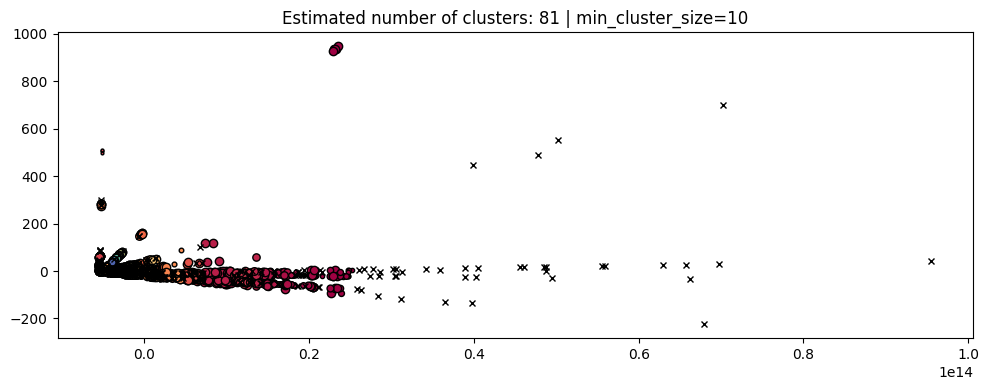

In [100]:
from sklearn.cluster import HDBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


%matplotlib inline
plt.figure(figsize=(10,6))

# 1. Prepare full-dimensional numeric data
X = small_df.select_dtypes(include=[np.number]).fillna(0).values
print(X.shape)

# 2. Fit HDBSCAN
clusterer = HDBSCAN(min_cluster_size=10, n_jobs=-1)
clusterer.fit(X)
labels = clusterer.labels_
probabilities = getattr(clusterer, "probabilities_", None)
print(np.count_nonzero(np.where(labels==-1)))

# 3. Project to 2D for visualization
X_2d = PCA(n_components=2).fit_transform(X)

# 4. Plot clusters
plot(X_2d, labels, probabilities=probabilities, parameters={"min_cluster_size":10})
plt.show()
